In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [6]:
house_data = pd.read_csv('house_data_ultimate_cleaned', sep=',')
df = house_data.copy()

In [7]:
df.head()

,Unnamed: 0,area,price,state_of_building,facades,bedrooms,fully_equipped_kitchen,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,swimming_pool,type_property,subtype_property,garden,garden_surface,open_fire_YN
0,0,123.0,200000,good,3.0,2.0,installed,no,NaN,3294,429.0,no,0,no,house,house,yes,350,yes
1,1,255.0,698000,just renovated,4.0,4.0,installed,no,NaN,2070,1210.0,no,0,no,house,villa,no,0,yes
2,2,234.0,499000,as new,NaN,5.0,NaN,no,NaN,8800,744.0,no,0,no,house,villa,no,0,yes
3,3,219.0,717000,as new,NaN,4.0,NaN,no,NaN,8000,760.0,no,0,no,house,house,no,0,yes
4,4,156.0,429000,good,4.0,4.0,installed,no,NaN,8800,419.0,no,0,no,house,villa,yes,90,yes


In [8]:
del df['Unnamed: 0']

In [9]:
df.head()

,area,price,state_of_building,facades,bedrooms,fully_equipped_kitchen,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,swimming_pool,type_property,subtype_property,garden,garden_surface,open_fire_YN
0,123.0,200000,good,3.0,2.0,installed,no,NaN,3294,429.0,no,0,no,house,house,yes,350,yes
1,255.0,698000,just renovated,4.0,4.0,installed,no,NaN,2070,1210.0,no,0,no,house,villa,no,0,yes
2,234.0,499000,as new,NaN,5.0,NaN,no,NaN,8800,744.0,no,0,no,house,villa,no,0,yes
3,219.0,717000,as new,NaN,4.0,NaN,no,NaN,8000,760.0,no,0,no,house,house,no,0,yes
4,156.0,429000,good,4.0,4.0,installed,no,NaN,8800,419.0,no,0,no,house,villa,yes,90,yes


In [10]:
df.isnull().sum()

area                         0
price                        0
state_of_building         2138
facades                   1684
bedrooms                    64
fully_equipped_kitchen    2412
furnished                    0
open_fire                 7631
zip_code                     0
land_surface                 0
terrace                      0
terrace_surface              0
swimming_pool                0
type_property                0
subtype_property             0
garden                       0
garden_surface               0
open_fire_YN                 0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8333 entries, 0 to 8332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area                    8333 non-null   float64
 1   price                   8333 non-null   int64  
 2   state_of_building       6195 non-null   object 
 3   facades                 6649 non-null   float64
 4   bedrooms                8269 non-null   float64
 5   fully_equipped_kitchen  5921 non-null   object 
 6   furnished               8333 non-null   object 
 7   open_fire               702 non-null    float64
 8   zip_code                8333 non-null   int64  
 9   land_surface            8333 non-null   float64
 10  terrace                 8333 non-null   object 
 11  terrace_surface         8333 non-null   int64  
 12  swimming_pool           8333 non-null   object 
 13  type_property           8333 non-null   object 
 14  subtype_property        8333 non-null   

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'area'),
  Text(1, 0, 'price'),
  Text(2, 0, 'facades'),
  Text(3, 0, 'bedrooms'),
  Text(4, 0, 'open_fire'),
  Text(5, 0, 'zip_code'),
  Text(6, 0, 'land_surface'),
  Text(7, 0, 'terrace_surface'),
  Text(8, 0, 'garden_surface')])

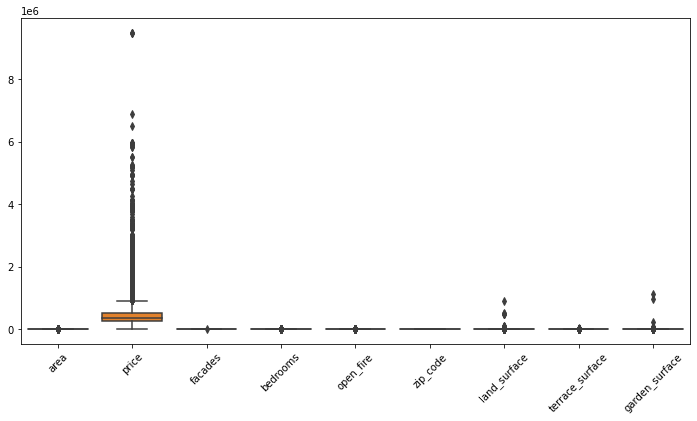

In [14]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(data=df)
plt.xticks(rotation=45)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

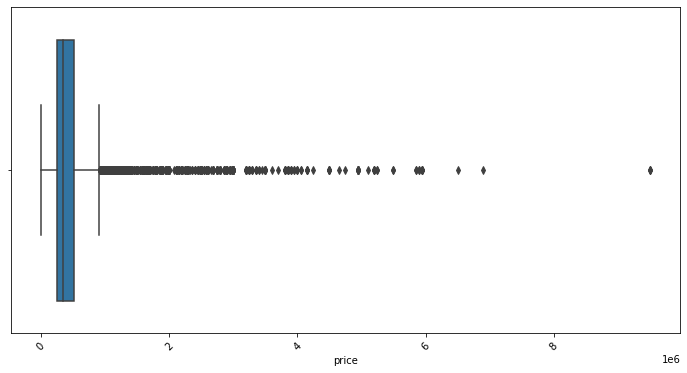

In [18]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for price only
sns.boxplot(x=df['price'])
plt.xticks(rotation=45)

In [17]:
df.price.describe()

count    8.333000e+03
mean     5.167265e+05
std      6.241331e+05
min      2.500000e+03
25%      2.499900e+05
50%      3.400000e+05
75%      5.150000e+05
max      9.500000e+06
Name: price, dtype: float64

In [24]:
df['price'].idxmax()
# df.loc[df['price'] == ]

1736

In [23]:
df.iloc[[df['price'].idxmax()]]

,area,price,state_of_building,facades,bedrooms,fully_equipped_kitchen,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,swimming_pool,type_property,subtype_property,garden,garden_surface,open_fire_YN
1736,1100.0,9500000,as new,4.0,12.0,installed,no,NaN,3090,500000.0,no,0,yes,house,castle,no,0,yes


In [28]:
z = np.abs(stats.zscore(df.price))
print(z)

[0.50749669 0.29045794 0.02840344 ... 0.7077865  0.56319488 0.10138436]


In [29]:
print(np.where(z > 3))

(array([  35,   55,   93,  199,  201,  203,  234,  267,  300,  336,  346,
        351,  463,  487,  603,  677,  751,  860,  869,  894,  932,  975,
        986, 1133, 1137, 1153, 1316, 1350, 1354, 1361, 1448, 1471, 1493,
       1539, 1682, 1716, 1730, 1736, 1750, 1790, 1791, 1910, 1974, 1982,
       2132, 2149, 2237, 2306, 2354, 2376, 2377, 2449, 2469, 2556, 2610,
       2620, 2624, 2721, 2728, 2775, 2801, 2938, 2971, 3000, 3004, 3023,
       3155, 3293, 3322, 3327, 3339, 3363, 3373, 3411, 3496, 3551, 3621,
       3630, 3834, 3842, 3987, 3997, 4022, 4027, 4075, 4085, 4095, 4101,
       4180, 4229, 4264, 4309, 4360, 4361, 4414, 4431, 4440, 4503, 4520,
       4535, 4668, 4677, 4678, 4706, 4712, 4737, 4746, 4750, 4751, 4804,
       4808, 4809, 4829, 4862, 4902, 4903, 4947, 4984, 5053, 5110, 5144,
       5171, 5177, 5215, 5239, 5315, 5328, 5338, 5401, 5416, 5433, 5531,
       5569, 5599, 5646, 5663, 5665, 5677, 5687, 5701, 5704, 5760, 5809,
       5839, 5867, 5890, 5929, 5975, 5980, 6050, 6

In [31]:
df.loc[35:35]

,area,price,state_of_building,facades,bedrooms,fully_equipped_kitchen,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,swimming_pool,type_property,subtype_property,garden,garden_surface,open_fire_YN
35,1600.0,5100000,as new,4.0,9.0,hyper equipped,no,NaN,2950,6335.0,no,0,yes,house,house,no,0,yes


In [32]:
df.loc[55:55]

,area,price,state_of_building,facades,bedrooms,fully_equipped_kitchen,furnished,open_fire,zip_code,land_surface,terrace,terrace_surface,swimming_pool,type_property,subtype_property,garden,garden_surface,open_fire_YN
55,1050.0,2450000,to be done up,4.0,10.0,hyper equipped,no,NaN,3090,3400.0,no,0,no,house,mixed,no,0,yes
